# Chapter 12 最小二乗法

## 12.1 最小二乗問題

本書の図12.1の小規模な最小二乗問題を取り上げ，$\|  A \hat{x} - b \|$は（$x$が$\hat{x}$ではない場合の）$\|  A x - b \|$よりも小さいことを確認しよう．


In [1]:
A = [ 2 0 ; -1 1 ; 0 2 ]

3×2 Array{Int64,2}:
  2  0
 -1  1
  0  2

In [2]:
b = [ 1, 0, -1 ]

3-element Array{Int64,1}:
  1
  0
 -1

In [3]:
xhat = [ 1/3, -1/3 ]

2-element Array{Float64,1}:
  0.3333333333333333
 -0.3333333333333333

In [4]:
rhat = A * xhat -b

3-element Array{Float64,1}:
 -0.33333333333333337
 -0.6666666666666666 
  0.33333333333333337

In [6]:
using LinearAlgebra

In [7]:
norm(rhat)

0.816496580927726

In [8]:
x = [ 1/2, -1/2 ]

2-element Array{Float64,1}:
  0.5
 -0.5

In [10]:
r = A * x -b

3-element Array{Float64,1}:
  0.0
 -1.0
  0.0

In [11]:
norm(r)

1.0

## 12.2 解

### 最小二乗解の公式

本書の式(12.5)と式(12.6)
$$
\hat{x} = (A^T A)^{-1} A^T b = A^\dagger b
$$
を図12.1の例でチェックしよう（ここで$\hat{x}=(1/3, 1/3)$）．


In [12]:
inv(A' * A) * A' * b

2-element Array{Float64,1}:
  0.33333333333333337
 -0.33333333333333337

In [13]:
pinv(A) * b

2-element Array{Float64,1}:
  0.3333333333333333
 -0.3333333333333335

In [14]:
xhat = [ 1/3, -1/3 ]

2-element Array{Float64,1}:
  0.3333333333333333
 -0.3333333333333333

In [16]:
(A' * A) * xhat - A' * b # 正規方程式が成り立つかどうかをチェック

2-element Array{Float64,1}:
 -2.220446049250313e-16
  2.220446049250313e-16

### 直交原理

直交原理の式(12.9)をチェックしよう．

In [17]:
z = [-1.1, 2.3];

In [18]:
(A * z)' * rhat

2.220446049250313e-16

In [19]:
z = [5.3, -1.2];

In [20]:
(A * z)' * rhat

-6.661338147750939e-16

## 12.3 最小二乗問題を解く

Juliaでは，バックスラッシュ演算子が最小二乗解`xhat = A\b`を求める記法である（後の章で見るように，係数行列が正方である連立方程式を解くためにも使われる）．


In [21]:
A = randn(100, 20); 
b = randn(100);
x1 = A \ b; # バックスラッシュoperatorを用いた最小二乗解
x2 = inv(A' * A) * (A' * b); # 公式を用いた解
x3 = pinv(A) * b; # 擬似逆行列を用いた解
Q, R = qr(A);
Q = Matrix(Q);
x4 = R \ (Q' * b);

In [22]:
norm(x1 - x2)

3.30942550264722e-16

In [23]:
norm(x2 - x3)

5.066372692605104e-16

In [24]:
norm(x3 - x4)

4.977757200370632e-16

### 計算量


$m \times n$行列$A$の最小二乗問題を解く計算量はおよそ$2mn^2$ flopsである．これを確認するために，Juliaで次元の異なるいくつかの問題を解いてみよう．


In [25]:
m = 2000; 
n = 500;
A = randn(m, n); 
b = randn(m);

In [26]:
@time x = A \ b;

  0.126008 seconds (4.05 k allocations: 12.030 MiB)


In [27]:
@time x = A \ b;

  0.123034 seconds (4.05 k allocations: 12.030 MiB)


In [28]:
m = 4000; 
n = 500;

In [30]:
@time x = A \ b;

  0.121636 seconds (4.05 k allocations: 12.030 MiB)


In [29]:
@time x = A \ b;

  0.143381 seconds (4.05 k allocations: 12.030 MiB, 10.41% gc time)


In [31]:
m = 2000; 
n = 1000;
A = randn(m, n); 
b = randn(m);

In [32]:
@time x = A \ b;

  1.257492 seconds (8.05 k allocations: 31.608 MiB, 7.70% gc time)


In [33]:
@time x = A \ b;

  0.708311 seconds (8.05 k allocations: 31.608 MiB, 9.93% gc time)


これから分かるように，$m$を2倍にすると計算時間も2倍になり，$n$を2倍にすると計算時間は4倍になる．この計算時間の計測結果から，計算を実行している計算機の計算速度を見積もることができる．例えば最後の問題では，flopsはおよそ$2mn^2=4\cdot 10^9$であり，これが0.4秒かかった．したがって計算速度はおよそ10 Gflp/secである．


### 行列最小二乗法

行列$A$が同じで$b$が異なる複数の最小二乗問題を解いてみよう．

In [34]:
A = randn(1000, 100); 
B = randn(1000, 10);
X = A \ B;
# Xの3列目が，右辺がBの3列目のときの最小二乗解であることをチェック
x3 = A \ B[:, 3];
norm(X[:, 3] - x3)

1.3508955670962554e-16

## 12.4 例

### 広告枠の購入

本書＊＊＊ページの最適な広告枠の購入問題の解を求めよう．


In [35]:
R = [ 0.97  1.86  0.41;
      1.23  2.18  0.53;
      0.80  1.24  0.62;
      1.29  0.98  0.51;
      1.10  1.23  0.69;
      0.67  0.34  0.54;
      0.87  0.26  0.62;
      1.10  0.16  0.48;
      1.92  0.22  0.71;
      1.29  0.12  0.62];
m, n = size(R);
vdes = 1e3 * ones(m);

In [36]:
s = R \ vdes

3-element Array{Float64,1}:
   62.07662454385102
   99.98500402826197
 1442.8374625412223 

In [37]:
using VMLS

In [38]:
rms(R * s - vdes)

132.63819026326524

### 照明

以下のコードは本書＊＊＊ページの照明設計問題を解き，照明レベルの2つのヒストグラムをプロットする（図12.1）．


In [39]:
using Plots

In [40]:
n = 10;  # 照明の数
lamps = [ # 照明のx,y座標と床からの高さ
      4.1  20.4  4;
     14.1  21.3  3.5;
     22.6  17.1  6;
      5.5  12.3  4.0;
     12.2   9.7  4.0;
     15.3  13.8  6;
     21.3  10.5  5.5;
      3.9   3.3  5.0;
     13.1   4.3  5.0;
     20.3   4.2  4.5 ];
N = 25; # グリッドサイズ
m = N * N; # 画素数
# 画素の中心座標を表すmx2行列
pixels = hcat(
            reshape( collect(0.5: 1 : N) * ones(1,N), m, 1),
            reshape( ones(N,1) * collect(0.5: 1 : N)', m, 1) );
# m x n行列Aは照明電力から照明レベルへの写像であり
# A[i,j]の値は照明jから領域iまでの距離の二乗に反比例する
A = zeros(m,n);
for i=1:m
    for j=1:n
        A[i,j] = 1.0 / norm([pixels[i,:]; 0] - lamps[j,:])^2;
    end; 
end;
A = (m / sum(A)) * A;   # Aの正規化
# 最小二乗解
x = A \ ones(m,1);
rms_ls = rms(A * x .- 1)

0.1403904813427606

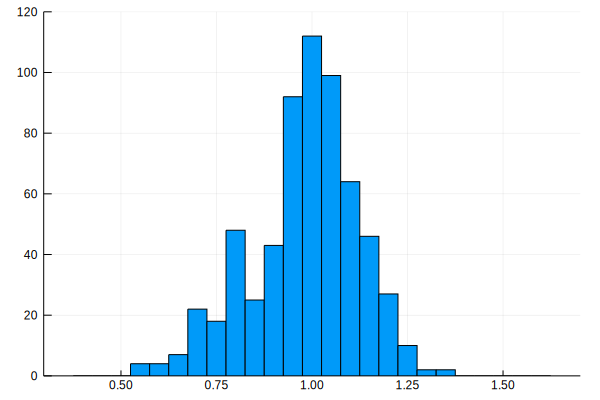

In [41]:
histogram(A*x, bins = (0.375:0.05:1.625),
            legend = false, ylim = (0,120))

In [42]:
# 全ての照明レベルが1の場合
rms_uniform = rms(A*ones(n,1) .- 1)

0.24174131853807881

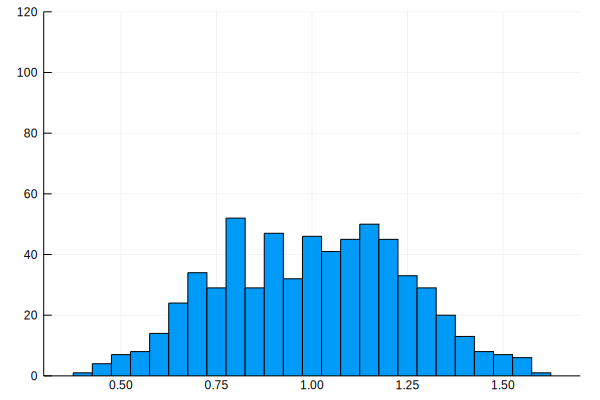

In [43]:
histogram(A*ones(n,1), bins = (0.375:0.05:1.625),
            legend = false, ylim = (0,120))

![図12.1（上）](fig12-1-1.pdf)
![図12.2（下）](fig12-1-2.pdf)

図12.1 電力を（上）$p = \boldsymbol{1}$にした場合と（下）$\hat{p}$にした場合の照明レベルのヒストグラム．


